<a href="https://colab.research.google.com/github/sserkan/pokemon/blob/master/plotly_uy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to clean and visualize a dataset using tools which are Python and Pandas, Seaborn, Pyplot and Plotly lib.**

In this example, I will show you how you can visualize your data using Seaborn, Pyplot and Plotly lib. For this, I used the “Aerial Bombing Operations in World War II” dataset. I downloaded it from Kaggle. The links are below. 
https://www.kaggle.com/usaf/world-war-ii

https://www.kaggle.com/smid80/weatherww2


**First recognize the datasets**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [0]:
aerial = pd.read_csv("operations.csv")
station = pd.read_csv("Weather Station Locations.csv")
weather = pd.read_csv("Summary of Weather.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
Mission ID                               178281 non-null int64
Mission Date                             178281 non-null object
Theater of Operations                    175123 non-null object
Country                                  126494 non-null object
Air Force                                126444 non-null object
Unit ID                                  50913 non-null object
Aircraft Series                          178165 non-null object
Callsign                                 21 non-null object
Mission Type                             47186 non-null object
Takeoff Base                             3383 non-null object
Takeoff Location                         3338 non-null object
Takeoff Latitude                         2981 non-null object
Takeoff Longitude                        2980 non-null float64
Target ID                                127406 non-null object
Target 

Below is the description of the some "aerial" data features 

Mission Date: Date of Mission

Theater of Operations: Land in which military operations take place

Country: Country that makes operation

Takeoff Base: Takeoff airport

Takeoff Location: Takeoff region like London

Takeoff Latitude: Latitude of takeoff region

Takeoff Longitude: Longitude of takeoff region

Target Country: Target country like China

Target City: Target city like London

In [0]:
print(aerial.Country.isnull().sum())
aerial = aerial[pd.isna(aerial.Country)==False] #aerial.Country.isna()

51787


In [0]:
print(aerial["Target Longitude"].isnull().sum())
aerial = aerial[aerial["Target Longitude"].isna()==False]

5973


In [0]:
print(aerial["Takeoff Longitude"].isnull().sum()) 
aerial = aerial[aerial["Takeoff Longitude"].isna()==False]

117579


In [0]:
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis = 1, inplace=True)

In [0]:
aerial = aerial[aerial.iloc[:,8]!=4248] #drop takeoff latitude

In [0]:
aerial = aerial[aerial.iloc[:,9]!=1355] #drop takeoff longitude

In [0]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 46357
Data columns (total 17 columns):
Mission Date             669 non-null object
Theater of Operations    669 non-null object
Country                  669 non-null object
Air Force                669 non-null object
Aircraft Series          669 non-null object
Callsign                 5 non-null object
Takeoff Base             669 non-null object
Takeoff Location         669 non-null object
Takeoff Latitude         669 non-null object
Takeoff Longitude        669 non-null float64
Target Country           642 non-null object
Target City              669 non-null object
Target Type              53 non-null object
Target Industry          52 non-null object
Target Priority          38 non-null object
Target Latitude          669 non-null float64
Target Longitude         669 non-null float64
dtypes: float64(3), object(14)
memory usage: 94.1+ KB


In [0]:
station = station.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"]]
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [0]:
weather = weather.loc[:,["STA","Date","MeanTemp"]]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


**Data Visualization**

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


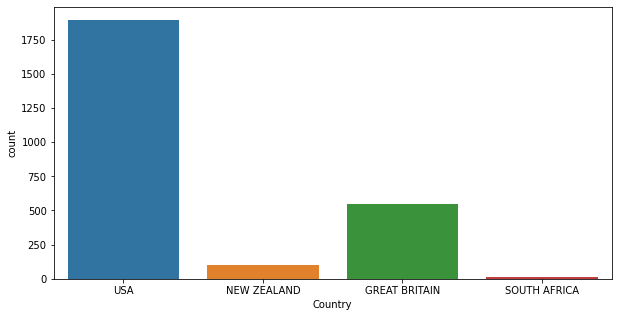

In [0]:
print(aerial.Country.value_counts())
plt.figure(figsize=(10,5))
sns.countplot(aerial.Country)
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
Name: Target Country, dtype: int64


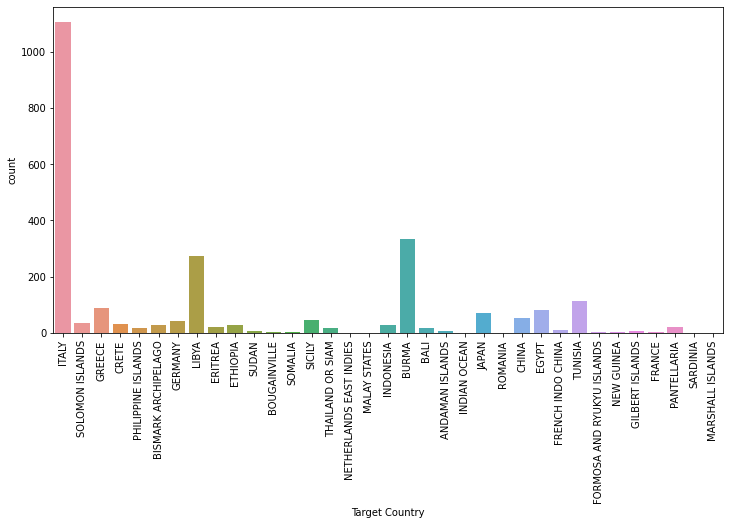

In [0]:
#Top target countries
print(aerial["Target Country"].value_counts()[:8])
plt.figure(figsize=(12,6))
sns.countplot(aerial["Target Country"])
plt.xticks(rotation=90)
plt.show()

In [0]:
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to b

In [0]:
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()
#iplot(fig)


In [0]:
# Bombing paths
# trace1
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]
# trace2
targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        
# trace3
flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = go.Figure( data=flight_paths + airports+targets, layout=layout )
fig.show()

In [0]:
data = [dict(
    type='scattergeo',
    lon = station.Longitude,
    lat = station.Latitude,
    hoverinfo = 'text',
    text = "Name: " + station.NAME + " Country: " + station["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
fig.show()